In [ ]:
# Manipulação e tratamento dos dados
import numpy as np
import pandas as pd

# graficos
import seaborn as sns
import matplotlib.pyplot as plt

# auxiliando na plotagem da matriz de confusao
import matplotlib

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, OneHotEncoder, OrdinalEncoder
from feature_engine.encoding import CountFrequencyEncoder

# separando os dados 
from sklearn.model_selection import train_test_split, learning_curve,KFold, LeaveOneOut, cross_validate, validation_curve

# modelagem
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

# metricas de eficiencia do modelo
from sklearn.metrics import r2_score, mean_absolute_error, accuracy_score, recall_score, precision_score, classification_report, confusion_matrix, f1_score

# fazer o cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold, KFold


#Feature Selection
from sklearn.feature_selection import RFECV, f_classif, chi2, SelectKBest
from sklearn.model_selection import GridSearchCV

# auxiliar para aleatoriedade
import random


# analise de correlação
import scipy.stats
import statsmodels.formula.api as smf



In [ ]:
# Importando o arquivo inicial com o conjunto de obras do SIMEC

pd.set_option('display.max_columns', 200)
df = pd.read_csv('D:/caiof/DATASCIENCE - CAIO/Dados/Projeto integrador/df_projeto_manipulada.csv')
df.head()

,ID,Situação,Cod_mun,Percentual de Execução,Data Prevista de Conclusão da Obra,Tipo de ensino / Modalidade,Tipo do Projeto,Tipo da Obra,Valor Pactuado pelo FNDE,Modalidade de Licitação,Homologação da Licitação,Data de Assinatura do Contrato,Valor do Contrato,Valor Pactuado com o FNDE,Data da Última Vistoria do Estado ou Município,Situação da Vistoria,OBS,Total Pago,Área Territorial - km² [2021],População estimada - pessoas [2021],Densidade demográfica - hab/km² [2010],Escolarização 6 a 14 anos - % [2010],IDHM Índice de desenvolvimento humano municipaL [2010],Receitas realizadas - R$ (×1000) [2017],Despesas empenhadas - R$ (×1000) [2017],PIB per capita - R$ [2019],emp_abertura,emp_porte,emp_natureza_juridica,emp_uf,emp_capital_social,emp_atividade_principal,emp_atividade_principal_code,emp_ultima_atualizacao,emp_num_obras,emp_num_concluidas,emp_num_em_execucao,emp_num_nao_concluidas,emp_%concluidas,emp_%nao_concluidas,num_obras,num_concluidas,num_em_execucao,num_nao_concluidas,%concluidas,%nao_concluidas
0,1365,Concluída,23133020.0,100.00,NaN,Educação Básica,Escola de Educação Infantil Tipo B,Construção,9500000.0,Tomada de Preço,2008-07-04 00:00:00,2008-07-04,100377602.0,9500000.0,2012-09-24,Concluído,NaN,NaN,4010618.0,592590.0,1387.0,97.7,0.633,1.360281e+10,1.357133e+10,1124542.0,1991-05-06,DEMAIS,230-5 - Empresa Individual de Responsabilidade...,CE,521789.0,Construção de estações e redes de distribuição...,42.21-9-02,2022-07-23,1.0,1.0,0.0,0.0,100.00,0.0,19.0,13.0,6.0,0.0,68.42,0.0
1,1366,Concluída,35123080.0,100.00,NaN,Educação Básica,Escola de Educação Infantil Tipo B,Construção,111707809.0,Tomada de Preço,2009-01-12 00:00:00,2009-04-02,111707809.0,111707809.0,2011-12-30,Concluído,NaN,NaN,46612.0,181380.0,3495.0,97.6,0.736,5.472410e+09,5.064559e+09,2128028.0,1989-11-27,EMPRESA DE PEQUENO PORTE,206-2 - Sociedade Empresária Limitada,SP,350000.0,Construção de edifícios,41.20-4-00,2022-06-27,6.0,4.0,2.0,0.0,66.67,0.0,5.0,3.0,2.0,0.0,60.00,0.0
2,1367,Concluída,35232060.0,100.00,2014-08-22,Educação Básica,Escola de Educação Infantil Tipo B,Construção,10240310.0,Convite,2008-12-04 00:00:00,2008-12-04,102171213.0,10240310.0,2014-08-18,Concluído,NaN,NaN,100386.0,507780.0,4776.0,9.8,0.703,1.133217e+09,1.002704e+10,1870948.0,2005-05-04,MICRO EMPRESA,206-2 - Sociedade Empresária Limitada,SP,0.0,********,00.00-0-00,2022-07-04,3.0,3.0,0.0,0.0,100.00,0.0,5.0,5.0,0.0,0.0,100.00,0.0
3,1368,Concluída,51071560.0,63.88,2014-01-02,Educação Básica,Escola de Educação Infantil Tipo B,Construção,95038237.0,Tomada de Preço,2012-05-16 00:00:00,2008-12-05,9473581.0,95038237.0,2014-07-22,Paralisado,Contrato Rescindido,NaN,1331677.0,27540.0,192.0,99.2,0.676,1.438297e+09,1.233900e+09,1408676.0,2007-03-10,MICRO EMPRESA,206-2 - Sociedade Empresária Limitada,MT,0.0,********,00.00-0-00,2022-06-15,1.0,0.0,0.0,1.0,0.00,100.0,2.0,1.0,0.0,1.0,50.00,50.0
4,1370,Inacabada,23125020.0,36.97,2014-11-25,Educação Básica,Escola de Educação Infantil Tipo B,Construção,12000780.0,Tomada de Preço,2011-06-22 00:00:00,2011-06-22,11989140.0,12000780.0,2015-03-17,Paralisado,Abandono da empresa,NaN,279451.0,75570.0,2817.0,99.2,0.654,2.131131e+09,1.866154e+09,1238996.0,1994-10-08,MICRO EMPRESA,206-2 - Sociedade Empresária Limitada,CE,0.0,********,00.00-0-00,2022-06-08,1.0,0.0,0.0,1.0,0.00,100.0,4.0,1.0,2.0,1.0,25.00,25.0


In [ ]:
# Analise inicial dos Missing Values
df.isna().sum()
#(df.isna().sum()/df.shape[0])*100

ID                                                            0
Situação                                                      0
Cod_mun                                                       2
Percentual de Execução                                        0
Data Prevista de Conclusão da Obra                        10145
Tipo de ensino / Modalidade                                   2
Tipo do Projeto                                               0
Tipo da Obra                                                414
Valor Pactuado pelo FNDE                                    479
Modalidade de Licitação                                    5878
Homologação da Licitação                                   6225
Data de Assinatura do Contrato                             6239
Valor do Contrato                                          3322
Valor Pactuado com o FNDE                                   479
Data da Última Vistoria do Estado ou Município             7452
Situação da Vistoria                    

### Verificamos que existiam muitos missing values. Excluir as linha nesse momento imputaria em uma grande perda de informação, logo, optamos por inicialmente excluir do modelo algumas colunas que não serão utilizadas, colunas essas com grande número de missing values.

In [ ]:
# Excluindo do DataFrame as colunas que serão inicialmente descartadas

df.drop(['Cod_mun',
         'emp_uf',
         'Data Prevista de Conclusão da Obra',
         'Homologação da Licitação',
         'Data de Assinatura do Contrato',
         'Tipo de ensino / Modalidade',
         'emp_atividade_principal',
         'Valor Pactuado pelo FNDE',
         'Valor Pactuado com o FNDE',
         'Total Pago', 
         'Receitas realizadas - R$ (×1000) [2017]', 
         'Despesas empenhadas - R$ (×1000) [2017]'], axis=1, inplace=True)

In [ ]:
# vamos utilizar apenas as linhas onde já houve uma efetiva contratação e a obra teoricamente cumpriu todos os trâmites para
#...sair do papel, logo, as linhas onde não há informação relativa a CNPJ signifca que não há contratação e serão excluídas

df_projeto = df.dropna(subset=['emp_abertura'])
df_projeto

,ID,Situação,Percentual de Execução,Tipo do Projeto,Tipo da Obra,Modalidade de Licitação,Valor do Contrato,Data da Última Vistoria do Estado ou Município,Situação da Vistoria,OBS,Área Territorial - km² [2021],População estimada - pessoas [2021],Densidade demográfica - hab/km² [2010],Escolarização 6 a 14 anos - % [2010],IDHM Índice de desenvolvimento humano municipaL [2010],PIB per capita - R$ [2019],emp_abertura,emp_porte,emp_natureza_juridica,emp_capital_social,emp_atividade_principal_code,emp_ultima_atualizacao,emp_num_obras,emp_num_concluidas,emp_num_em_execucao,emp_num_nao_concluidas,emp_%concluidas,emp_%nao_concluidas,num_obras,num_concluidas,num_em_execucao,num_nao_concluidas,%concluidas,%nao_concluidas
0,1365,Concluída,100.00,Escola de Educação Infantil Tipo B,Construção,Tomada de Preço,100377602.0,2012-09-24,Concluído,NaN,4010618.0,592590.0,1387.0,97.7,0.633,1124542.0,1991-05-06,DEMAIS,230-5 - Empresa Individual de Responsabilidade...,521789.0,42.21-9-02,2022-07-23,1.0,1.0,0.0,0.0,100.00,0.0,19.0,13.0,6.0,0.0,68.42,0.00
1,1366,Concluída,100.00,Escola de Educação Infantil Tipo B,Construção,Tomada de Preço,111707809.0,2011-12-30,Concluído,NaN,46612.0,181380.0,3495.0,97.6,0.736,2128028.0,1989-11-27,EMPRESA DE PEQUENO PORTE,206-2 - Sociedade Empresária Limitada,350000.0,41.20-4-00,2022-06-27,6.0,4.0,2.0,0.0,66.67,0.0,5.0,3.0,2.0,0.0,60.00,0.00
2,1367,Concluída,100.00,Escola de Educação Infantil Tipo B,Construção,Convite,102171213.0,2014-08-18,Concluído,NaN,100386.0,507780.0,4776.0,9.8,0.703,1870948.0,2005-05-04,MICRO EMPRESA,206-2 - Sociedade Empresária Limitada,0.0,00.00-0-00,2022-07-04,3.0,3.0,0.0,0.0,100.00,0.0,5.0,5.0,0.0,0.0,100.00,0.00
3,1368,Concluída,63.88,Escola de Educação Infantil Tipo B,Construção,Tomada de Preço,9473581.0,2014-07-22,Paralisado,Contrato Rescindido,1331677.0,27540.0,192.0,99.2,0.676,1408676.0,2007-03-10,MICRO EMPRESA,206-2 - Sociedade Empresária Limitada,0.0,00.00-0-00,2022-06-15,1.0,0.0,0.0,1.0,0.00,100.0,2.0,1.0,0.0,1.0,50.00,50.00
4,1370,Inacabada,36.97,Escola de Educação Infantil Tipo B,Construção,Tomada de Preço,11989140.0,2015-03-17,Paralisado,Abandono da empresa,279451.0,75570.0,2817.0,99.2,0.654,1238996.0,1994-10-08,MICRO EMPRESA,206-2 - Sociedade Empresária Limitada,0.0,00.00-0-00,2022-06-08,1.0,0.0,0.0,1.0,0.00,100.0,4.0,1.0,2.0,1.0,25.00,25.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29910,1111719,Execução,0.00,Escola 6 Salas,Construção,Tomada de Preço,190063065.0,NaN,NaN,NaN,188221.0,216900.0,11101.0,94.7,0.565,1004999.0,2005-03-16,MICRO EMPRESA,206-2 - Sociedade Empresária Limitada,1000000.0,41.20-4-00,2022-06-13,0.0,0.0,0.0,0.0,0.00,0.0,5.0,3.0,2.0,0.0,60.00,0.00
29912,1105233,Execução,10.25,Escola - Projeto Próprio,Construção,Concorrência,608995868.0,2021-09-10,Em Execução,NaN,5760784.0,30943250.0,44466.0,97.5,0.824,9074275.0,2011-08-26,DEMAIS,206-2 - Sociedade Empresária Limitada,480000.0,41.20-4-00,2022-06-21,4.0,3.0,1.0,0.0,75.00,0.0,107.0,95.0,12.0,0.0,88.79,0.00
29935,1110557,Execução,0.00,Reforma,Reforma,Concorrência,525428199.0,NaN,NaN,NaN,540548.0,424010.0,744.0,99.3,0.721,3257425.0,2020-04-20,MICRO EMPRESA,206-2 - Sociedade Empresária Limitada,500000.0,43.99-1-03,2022-07-26,0.0,0.0,0.0,0.0,0.00,0.0,11.0,11.0,0.0,0.0,100.00,0.00
29947,1111947,Execução,0.00,Quadra Escolar Coberta e Vestiário - Modelo 2,Ampliação,Tomada de Preço,76783915.0,NaN,NaN,NaN,1170742.0,446490.0,3635.0,97.9,0.577,897606.0,2003-04-02,EMPRESA DE PEQUENO PORTE,230-5 - Empresa Individual de Responsabilidade...,750000.0,41.20-4-00,2022-07-26,0.0,0.0,0.0,0.0,0.00,0.0,11.0,10.0,1.0,0.0,90.91,0.00


In [ ]:
# Verifiando novamente os missing values

df_projeto.isna().sum()

ID                                                            0
Situação                                                      0
Percentual de Execução                                        0
Tipo do Projeto                                               0
Tipo da Obra                                                357
Modalidade de Licitação                                     528
Valor do Contrato                                             5
Data da Última Vistoria do Estado ou Município              939
Situação da Vistoria                                        939
OBS                                                       20884
Área Territorial - km² [2021]                                 0
População estimada - pessoas [2021]                           0
Densidade demográfica - hab/km² [2010]                        7
Escolarização 6 a 14 anos - % [2010]                          0
IDHM Índice de desenvolvimento humano municipaL [2010]        0
PIB per capita - R$ [2019]              

# DATA CLEANING

# Tratando os missing values

Uma vez que foi definido o DataFrame que iremos trabalhar, trataremos de forma definitiva os missing values a fim de ter um DataFrame pronto para modelagem.

In [ ]:
# A coluna 'Tipo da Obra' possui 357 valores ausentes, para o preenchimento deles nossa opção foi utilizar o valor mais
#...recorrente

df_projeto['Tipo da Obra'].fillna(df_projeto['Tipo da Obra'].value_counts().index[0], inplace=True)

C:\Users\caiof\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
# A coluna 'Modalidade de Licitação' possui 528 valores ausentes os quais iremos preencher com o valor mais recorrente

df_projeto['Modalidade de Licitação'].fillna(df_projeto['Modalidade de Licitação'].value_counts().index[0], inplace=True)

In [ ]:
df_projeto.isna().sum()

ID                                                            0
Situação                                                      0
Percentual de Execução                                        0
Tipo do Projeto                                               0
Tipo da Obra                                                  0
Modalidade de Licitação                                       0
Valor do Contrato                                             5
Data da Última Vistoria do Estado ou Município              939
Situação da Vistoria                                        939
OBS                                                       20884
Área Territorial - km² [2021]                                 0
População estimada - pessoas [2021]                           0
Densidade demográfica - hab/km² [2010]                        7
Escolarização 6 a 14 anos - % [2010]                          0
IDHM Índice de desenvolvimento humano municipaL [2010]        0
PIB per capita - R$ [2019]              

### Decidimos utilizar apenas as obras com execução iniciada, ou seja, as que a situação são de "Concluída", "Execução", "Inacabada", "Paralisada". Acrescidas das linhas cuja situação é "Obra Cancelada", mas que há alguma valor na coluna de "Situação da Vistoria".

In [ ]:
df_projetoFiltrada = df_projeto.copy()

In [ ]:
#df_canceladasIniciadas = df_projeto[(df_projeto['Situação'].isin(['Obra Cancelada']) & (~df_projeto['Situação da Vistoria'].isna()))]

In [ ]:
#df_projetoFiltrada = pd.concat([df_projetoFiltrada, df_canceladasIniciadas], axis=0, ignore_index=True).reset_index(drop=True)
#df_projetoFiltrada

In [ ]:
# Criando uma lista de condições e uma lista de valores a serem retornados. Elas serão usados com a função np.select para criar
#....uma nova coluna chamada 'Status' a qual vai ser preenchida através de condições comparativas entre outras colunas

conditionlist = [
    (df_projetoFiltrada['Situação'] == df_projetoFiltrada['Situação da Vistoria']),
    (df_projetoFiltrada['Situação'] != df_projetoFiltrada['Situação da Vistoria']) &
    (df_projetoFiltrada['Situação'] == "Obra Cancelada"),
    (df_projetoFiltrada['Situação'] != df_projetoFiltrada['Situação da Vistoria']) &
    (df_projetoFiltrada['Situação da Vistoria'] == "Concluído"),
    (df_projetoFiltrada['Situação'] != df_projetoFiltrada['Situação da Vistoria']) &
    (df_projetoFiltrada['Situação'] != "Obra Cancelada") & (df_projetoFiltrada['Situação da Vistoria'] != "Concluído")
    
]

choicelist = [
    df_projetoFiltrada['Situação da Vistoria'],
    df_projetoFiltrada['Situação'],
    df_projetoFiltrada['Situação da Vistoria'],
    df_projetoFiltrada['Situação da Vistoria'],
]

In [ ]:
# chamando a função no.select e as condições anteriormente definidas para criar a coluna 'Status'

df_projetoFiltrada['Status'] = np.select(conditionlist, choicelist, default='Not Specified')
df_projetoFiltrada

,ID,Situação,Percentual de Execução,Tipo do Projeto,Tipo da Obra,Modalidade de Licitação,Valor do Contrato,Data da Última Vistoria do Estado ou Município,Situação da Vistoria,OBS,Área Territorial - km² [2021],População estimada - pessoas [2021],Densidade demográfica - hab/km² [2010],Escolarização 6 a 14 anos - % [2010],IDHM Índice de desenvolvimento humano municipaL [2010],PIB per capita - R$ [2019],emp_abertura,emp_porte,emp_natureza_juridica,emp_capital_social,emp_atividade_principal_code,emp_ultima_atualizacao,emp_num_obras,emp_num_concluidas,emp_num_em_execucao,emp_num_nao_concluidas,emp_%concluidas,emp_%nao_concluidas,num_obras,num_concluidas,num_em_execucao,num_nao_concluidas,%concluidas,%nao_concluidas,Status
0,1365,Concluída,100.00,Escola de Educação Infantil Tipo B,Construção,Tomada de Preço,100377602.0,2012-09-24,Concluído,NaN,4010618.0,592590.0,1387.0,97.7,0.633,1124542.0,1991-05-06,DEMAIS,230-5 - Empresa Individual de Responsabilidade...,521789.0,42.21-9-02,2022-07-23,1.0,1.0,0.0,0.0,100.00,0.0,19.0,13.0,6.0,0.0,68.42,0.00,Concluído
1,1366,Concluída,100.00,Escola de Educação Infantil Tipo B,Construção,Tomada de Preço,111707809.0,2011-12-30,Concluído,NaN,46612.0,181380.0,3495.0,97.6,0.736,2128028.0,1989-11-27,EMPRESA DE PEQUENO PORTE,206-2 - Sociedade Empresária Limitada,350000.0,41.20-4-00,2022-06-27,6.0,4.0,2.0,0.0,66.67,0.0,5.0,3.0,2.0,0.0,60.00,0.00,Concluído
2,1367,Concluída,100.00,Escola de Educação Infantil Tipo B,Construção,Convite,102171213.0,2014-08-18,Concluído,NaN,100386.0,507780.0,4776.0,9.8,0.703,1870948.0,2005-05-04,MICRO EMPRESA,206-2 - Sociedade Empresária Limitada,0.0,00.00-0-00,2022-07-04,3.0,3.0,0.0,0.0,100.00,0.0,5.0,5.0,0.0,0.0,100.00,0.00,Concluído
3,1368,Concluída,63.88,Escola de Educação Infantil Tipo B,Construção,Tomada de Preço,9473581.0,2014-07-22,Paralisado,Contrato Rescindido,1331677.0,27540.0,192.0,99.2,0.676,1408676.0,2007-03-10,MICRO EMPRESA,206-2 - Sociedade Empresária Limitada,0.0,00.00-0-00,2022-06-15,1.0,0.0,0.0,1.0,0.00,100.0,2.0,1.0,0.0,1.0,50.00,50.00,Paralisado
4,1370,Inacabada,36.97,Escola de Educação Infantil Tipo B,Construção,Tomada de Preço,11989140.0,2015-03-17,Paralisado,Abandono da empresa,279451.0,75570.0,2817.0,99.2,0.654,1238996.0,1994-10-08,MICRO EMPRESA,206-2 - Sociedade Empresária Limitada,0.0,00.00-0-00,2022-06-08,1.0,0.0,0.0,1.0,0.00,100.0,4.0,1.0,2.0,1.0,25.00,25.00,Paralisado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29910,1111719,Execução,0.00,Escola 6 Salas,Construção,Tomada de Preço,190063065.0,NaN,NaN,NaN,188221.0,216900.0,11101.0,94.7,0.565,1004999.0,2005-03-16,MICRO EMPRESA,206-2 - Sociedade Empresária Limitada,1000000.0,41.20-4-00,2022-06-13,0.0,0.0,0.0,0.0,0.00,0.0,5.0,3.0,2.0,0.0,60.00,0.00,NaN
29912,1105233,Execução,10.25,Escola - Projeto Próprio,Construção,Concorrência,608995868.0,2021-09-10,Em Execução,NaN,5760784.0,30943250.0,44466.0,97.5,0.824,9074275.0,2011-08-26,DEMAIS,206-2 - Sociedade Empresária Limitada,480000.0,41.20-4-00,2022-06-21,4.0,3.0,1.0,0.0,75.00,0.0,107.0,95.0,12.0,0.0,88.79,0.00,Em Execução
29935,1110557,Execução,0.00,Reforma,Reforma,Concorrência,525428199.0,NaN,NaN,NaN,540548.0,424010.0,744.0,99.3,0.721,3257425.0,2020-04-20,MICRO EMPRESA,206-2 - Sociedade Empresária Limitada,500000.0,43.99-1-03,2022-07-26,0.0,0.0,0.0,0.0,0.00,0.0,11.0,11.0,0.0,0.0,100.00,0.00,NaN
29947,1111947,Execução,0.00,Quadra Escolar Coberta e Vestiário - Modelo 2,Ampliação,Tomada de Preço,76783915.0,NaN,NaN,NaN,1170742.0,446490.0,3635.0,97.9,0.577,897606.0,2003-04-02,EMPRESA DE PEQUENO PORTE,230-5 - Empresa Individual de Responsabilidade...,750000.0,41.20-4-00,2022-07-26,0.0,0.0,0.0,0.0,0.00,0.0,11.0,10.0,1.0,0.0,90.91,0.00,NaN


In [ ]:
# Verificando se as condições atenderam a todas as rows da coluna.

df_projetoFiltrada['Status'].value_counts()

Concluído                          15555
Em Execução                         4239
Paralisado                          2097
Obra Cancelada                       640
Convênio Cancelado                     1
Contrato Cancelado                     1
Em Planejamento pelo Proponente        1
Em Licitação                           1
Name: Status, dtype: int64

In [ ]:
df_projetoFiltrada['Status'] = np.where(df_projetoFiltrada['Status'].isna(),
                                        df_projetoFiltrada['Situação'],
                                        df_projetoFiltrada['Status'])

In [ ]:
df_projetoFiltrada.isna().sum()

ID                                                            0
Situação                                                      0
Percentual de Execução                                        0
Tipo do Projeto                                               0
Tipo da Obra                                                  0
Modalidade de Licitação                                       0
Valor do Contrato                                             5
Data da Última Vistoria do Estado ou Município              939
Situação da Vistoria                                        939
OBS                                                       20884
Área Territorial - km² [2021]                                 0
População estimada - pessoas [2021]                           0
Densidade demográfica - hab/km² [2010]                        7
Escolarização 6 a 14 anos - % [2010]                          0
IDHM Índice de desenvolvimento humano municipaL [2010]        0
PIB per capita - R$ [2019]              

In [ ]:
df_projetoFiltrada['Status'].value_counts()

Concluído                          15555
Em Execução                         4239
Paralisado                          2097
Obra Cancelada                       640
Execução                             198
Concluída                            137
Inacabada                            122
Contratação                           95
Em Reformulação                        7
Licitação                              2
Paralisada                             2
Convênio Cancelado                     1
Contrato Cancelado                     1
Em Planejamento pelo Proponente        1
Em Licitação                           1
Planejamento pelo proponente           1
Name: Status, dtype: int64

In [ ]:
# Excluindo do DataFrame as linhas que a obra nem se iniciou, com base na análise do status

df_projetoFiltrada = df_projetoFiltrada[~df_projetoFiltrada['Status'].isin(['Convênio Cancelado',
                                                                            'Contrato Cancelado',
                                                                            'Em Planejamento pelo Proponente',
                                                                            'Em Licitação',
                                                                            'Em Reformulação', 
                                                                            'Planejamento pelo proponente', 
                                                                            'Licitação',
                                                                            'Contratação'])]
df_projetoFiltrada

,ID,Situação,Percentual de Execução,Tipo do Projeto,Tipo da Obra,Modalidade de Licitação,Valor do Contrato,Data da Última Vistoria do Estado ou Município,Situação da Vistoria,OBS,Área Territorial - km² [2021],População estimada - pessoas [2021],Densidade demográfica - hab/km² [2010],Escolarização 6 a 14 anos - % [2010],IDHM Índice de desenvolvimento humano municipaL [2010],PIB per capita - R$ [2019],emp_abertura,emp_porte,emp_natureza_juridica,emp_capital_social,emp_atividade_principal_code,emp_ultima_atualizacao,emp_num_obras,emp_num_concluidas,emp_num_em_execucao,emp_num_nao_concluidas,emp_%concluidas,emp_%nao_concluidas,num_obras,num_concluidas,num_em_execucao,num_nao_concluidas,%concluidas,%nao_concluidas,Status
0,1365,Concluída,100.00,Escola de Educação Infantil Tipo B,Construção,Tomada de Preço,100377602.0,2012-09-24,Concluído,NaN,4010618.0,592590.0,1387.0,97.7,0.633,1124542.0,1991-05-06,DEMAIS,230-5 - Empresa Individual de Responsabilidade...,521789.0,42.21-9-02,2022-07-23,1.0,1.0,0.0,0.0,100.00,0.0,19.0,13.0,6.0,0.0,68.42,0.00,Concluído
1,1366,Concluída,100.00,Escola de Educação Infantil Tipo B,Construção,Tomada de Preço,111707809.0,2011-12-30,Concluído,NaN,46612.0,181380.0,3495.0,97.6,0.736,2128028.0,1989-11-27,EMPRESA DE PEQUENO PORTE,206-2 - Sociedade Empresária Limitada,350000.0,41.20-4-00,2022-06-27,6.0,4.0,2.0,0.0,66.67,0.0,5.0,3.0,2.0,0.0,60.00,0.00,Concluído
2,1367,Concluída,100.00,Escola de Educação Infantil Tipo B,Construção,Convite,102171213.0,2014-08-18,Concluído,NaN,100386.0,507780.0,4776.0,9.8,0.703,1870948.0,2005-05-04,MICRO EMPRESA,206-2 - Sociedade Empresária Limitada,0.0,00.00-0-00,2022-07-04,3.0,3.0,0.0,0.0,100.00,0.0,5.0,5.0,0.0,0.0,100.00,0.00,Concluído
3,1368,Concluída,63.88,Escola de Educação Infantil Tipo B,Construção,Tomada de Preço,9473581.0,2014-07-22,Paralisado,Contrato Rescindido,1331677.0,27540.0,192.0,99.2,0.676,1408676.0,2007-03-10,MICRO EMPRESA,206-2 - Sociedade Empresária Limitada,0.0,00.00-0-00,2022-06-15,1.0,0.0,0.0,1.0,0.00,100.0,2.0,1.0,0.0,1.0,50.00,50.00,Paralisado
4,1370,Inacabada,36.97,Escola de Educação Infantil Tipo B,Construção,Tomada de Preço,11989140.0,2015-03-17,Paralisado,Abandono da empresa,279451.0,75570.0,2817.0,99.2,0.654,1238996.0,1994-10-08,MICRO EMPRESA,206-2 - Sociedade Empresária Limitada,0.0,00.00-0-00,2022-06-08,1.0,0.0,0.0,1.0,0.00,100.0,4.0,1.0,2.0,1.0,25.00,25.00,Paralisado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29910,1111719,Execução,0.00,Escola 6 Salas,Construção,Tomada de Preço,190063065.0,NaN,NaN,NaN,188221.0,216900.0,11101.0,94.7,0.565,1004999.0,2005-03-16,MICRO EMPRESA,206-2 - Sociedade Empresária Limitada,1000000.0,41.20-4-00,2022-06-13,0.0,0.0,0.0,0.0,0.00,0.0,5.0,3.0,2.0,0.0,60.00,0.00,Execução
29912,1105233,Execução,10.25,Escola - Projeto Próprio,Construção,Concorrência,608995868.0,2021-09-10,Em Execução,NaN,5760784.0,30943250.0,44466.0,97.5,0.824,9074275.0,2011-08-26,DEMAIS,206-2 - Sociedade Empresária Limitada,480000.0,41.20-4-00,2022-06-21,4.0,3.0,1.0,0.0,75.00,0.0,107.0,95.0,12.0,0.0,88.79,0.00,Em Execução
29935,1110557,Execução,0.00,Reforma,Reforma,Concorrência,525428199.0,NaN,NaN,NaN,540548.0,424010.0,744.0,99.3,0.721,3257425.0,2020-04-20,MICRO EMPRESA,206-2 - Sociedade Empresária Limitada,500000.0,43.99-1-03,2022-07-26,0.0,0.0,0.0,0.0,0.00,0.0,11.0,11.0,0.0,0.0,100.00,0.00,Execução
29947,1111947,Execução,0.00,Quadra Escolar Coberta e Vestiário - Modelo 2,Ampliação,Tomada de Preço,76783915.0,NaN,NaN,NaN,1170742.0,446490.0,3635.0,97.9,0.577,897606.0,2003-04-02,EMPRESA DE PEQUENO PORTE,230-5 - Empresa Individual de Responsabilidade...,750000.0,41.20-4-00,2022-07-26,0.0,0.0,0.0,0.0,0.00,0.0,11.0,10.0,1.0,0.0,90.91,0.00,Execução


In [ ]:
df_projetoFiltrada = df_projetoFiltrada.drop(['Data da Última Vistoria do Estado ou Município', 'Situação da Vistoria'], axis=1)

In [ ]:
df_projetoFiltrada.isna().sum()

ID                                                            0
Situação                                                      0
Percentual de Execução                                        0
Tipo do Projeto                                               0
Tipo da Obra                                                  0
Modalidade de Licitação                                       0
Valor do Contrato                                             5
OBS                                                       20775
Área Territorial - km² [2021]                                 0
População estimada - pessoas [2021]                           0
Densidade demográfica - hab/km² [2010]                        7
Escolarização 6 a 14 anos - % [2010]                          0
IDHM Índice de desenvolvimento humano municipaL [2010]        0
PIB per capita - R$ [2019]                                    0
emp_abertura                                                  0
emp_porte                               

# FEATURE ENGINEERING

## Tratando as colunas categóricas

In [ ]:
df_projetoFiltrada['Status'].value_counts()

# Solução: Dummy

Concluído         15555
Em Execução        4239
Paralisado         2097
Obra Cancelada      640
Execução            198
Concluída           137
Inacabada           122
Paralisada            2
Name: Status, dtype: int64

In [ ]:
conditionlist2 = [
    (df_projetoFiltrada['Status'] == 'Concluída'),
    (df_projetoFiltrada['Status'] == 'Concluído'),
    (df_projetoFiltrada['Status'] == 'Em Execução'),
    (df_projetoFiltrada['Status'] == 'Execução'),
    (df_projetoFiltrada['Status'] == 'Paralisada'),
    (df_projetoFiltrada['Status'] == 'Paralisado'),
    (df_projetoFiltrada['Status'] == 'Obra Cancelada'),
    (df_projetoFiltrada['Status'] == 'Inacabada')
    
]

choicelist2 = ['Concluído', 
               'Concluído',
               'Execução', 
               'Execução', 
               'Paralisado', 
               'Paralisado', 
               'Obra Cancelada', 
               'Inacabada']

In [ ]:
df_projetoFiltrada['Status'] = np.select(conditionlist2, choicelist2, default='Not Specified')
df_projetoFiltrada['Status'].value_counts()

Concluído         15692
Execução           4437
Paralisado         2099
Obra Cancelada      640
Inacabada           122
Name: Status, dtype: int64

In [ ]:
df_projetoFiltrada[~df_projetoFiltrada['Status'].isin(['Execução'])]['Status'].value_counts()

Concluído         15692
Paralisado         2099
Obra Cancelada      640
Inacabada           122
Name: Status, dtype: int64

In [ ]:
df_projetoInicioModelagem = df_projetoFiltrada[~df_projetoFiltrada['Status'].isin(['Execução'])]

## Criando a feature target

Criamos uma nova coluna chamada 'Conclusão' a qual em caso do status da obra na coluna 'Status'  ser concluída a nova coluna trará o valor 1, nas demais situações de 'Status' o valor da coluna target será 0.

In [ ]:
df_projetoInicioModelagem['Conclusão'] = np.where(df_projetoInicioModelagem['Status'] == 'Concluído',0,1)
df_projetoInicioModelagem

C:\Users\caiof\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,ID,Situação,Percentual de Execução,Tipo do Projeto,Tipo da Obra,Modalidade de Licitação,Valor do Contrato,OBS,Área Territorial - km² [2021],População estimada - pessoas [2021],Densidade demográfica - hab/km² [2010],Escolarização 6 a 14 anos - % [2010],IDHM Índice de desenvolvimento humano municipaL [2010],PIB per capita - R$ [2019],emp_abertura,emp_porte,emp_natureza_juridica,emp_capital_social,emp_atividade_principal_code,emp_ultima_atualizacao,emp_num_obras,emp_num_concluidas,emp_num_em_execucao,emp_num_nao_concluidas,emp_%concluidas,emp_%nao_concluidas,num_obras,num_concluidas,num_em_execucao,num_nao_concluidas,%concluidas,%nao_concluidas,Status,Conclusão
0,1365,Concluída,100.00,Escola de Educação Infantil Tipo B,Construção,Tomada de Preço,100377602.0,NaN,4010618.0,592590.0,1387.0,97.7,0.633,1124542.0,1991-05-06,DEMAIS,230-5 - Empresa Individual de Responsabilidade...,521789.0,42.21-9-02,2022-07-23,1.0,1.0,0.0,0.0,100.00,0.00,19.0,13.0,6.0,0.0,68.42,0.00,Concluído,0
1,1366,Concluída,100.00,Escola de Educação Infantil Tipo B,Construção,Tomada de Preço,111707809.0,NaN,46612.0,181380.0,3495.0,97.6,0.736,2128028.0,1989-11-27,EMPRESA DE PEQUENO PORTE,206-2 - Sociedade Empresária Limitada,350000.0,41.20-4-00,2022-06-27,6.0,4.0,2.0,0.0,66.67,0.00,5.0,3.0,2.0,0.0,60.00,0.00,Concluído,0
2,1367,Concluída,100.00,Escola de Educação Infantil Tipo B,Construção,Convite,102171213.0,NaN,100386.0,507780.0,4776.0,9.8,0.703,1870948.0,2005-05-04,MICRO EMPRESA,206-2 - Sociedade Empresária Limitada,0.0,00.00-0-00,2022-07-04,3.0,3.0,0.0,0.0,100.00,0.00,5.0,5.0,0.0,0.0,100.00,0.00,Concluído,0
3,1368,Concluída,63.88,Escola de Educação Infantil Tipo B,Construção,Tomada de Preço,9473581.0,Contrato Rescindido,1331677.0,27540.0,192.0,99.2,0.676,1408676.0,2007-03-10,MICRO EMPRESA,206-2 - Sociedade Empresária Limitada,0.0,00.00-0-00,2022-06-15,1.0,0.0,0.0,1.0,0.00,100.00,2.0,1.0,0.0,1.0,50.00,50.00,Paralisado,1
4,1370,Inacabada,36.97,Escola de Educação Infantil Tipo B,Construção,Tomada de Preço,11989140.0,Abandono da empresa,279451.0,75570.0,2817.0,99.2,0.654,1238996.0,1994-10-08,MICRO EMPRESA,206-2 - Sociedade Empresária Limitada,0.0,00.00-0-00,2022-06-08,1.0,0.0,0.0,1.0,0.00,100.00,4.0,1.0,2.0,1.0,25.00,25.00,Paralisado,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29465,1105351,Obra Cancelada,0.00,Ampliação,Ampliação,Tomada de Preço,2676305.0,NaN,238157.0,704660.0,2656.0,92.4,0.572,1022361.0,2016-05-04,MICRO EMPRESA,230-5 - Empresa Individual de Responsabilidade...,2000000.0,41.20-4-00,2022-07-03,1.0,0.0,1.0,0.0,0.00,0.00,8.0,5.0,3.0,0.0,62.50,0.00,Obra Cancelada,1
29499,1107034,Paralisada,62.17,Quadra Escolar Coberta e Vestiário - Modelo 2,Ampliação,Tomada de Preço,95637373.0,Atraso no Pagamento Construtora,25260429.0,77770.0,32.0,8.1,0.477,1302989.0,2018-12-21,EMPRESA DE PEQUENO PORTE,230-5 - Empresa Individual de Responsabilidade...,700000.0,41.20-4-00,2022-07-26,1.0,0.0,0.0,1.0,0.00,100.00,4.0,1.0,1.0,2.0,25.00,50.00,Paralisado,1
29502,1107058,Paralisada,1.23,Creche Pré-Escola - Tipo 1,Construção,Concorrência,350699625.0,Contrato Rescindido,25260429.0,77770.0,32.0,8.1,0.477,1302989.0,2015-01-29,MICRO EMPRESA,230-5 - Empresa Individual de Responsabilidade...,1500000.0,41.20-4-00,2022-06-29,3.0,0.0,2.0,1.0,0.00,33.33,4.0,1.0,1.0,2.0,25.00,50.00,Paralisado,1
29552,1108176,Paralisada,24.10,Creche Pré-Escola - Tipo 2,Construção,Concorrência,205995805.0,Paralisação por falta de pagamento à empresa e...,109541.0,67120.0,6046.0,99.6,0.762,3662833.0,2005-08-23,MICRO EMPRESA,206-2 - Sociedade Empresária Limitada,0.0,41.20-4-00,2022-06-13,4.0,3.0,0.0,1.0,75.00,25.00,2.0,1.0,0.0,1.0,50.00,50.00,Paralisado,1


## `Usando o Frequency Encoder` nas features:
- 'Tipo do Projeto'
- 'Tipo da Obra'
- 'emp_porte'
- 'emp_natureza_juridica'

In [ ]:
df_projetoInicioModelagem['Tipo do Projeto'].value_counts()

# Solução: FrenquencyEncoder

Quadra Escolar Coberta com Vestiário             3542
Escola de Educação Infantil Tipo B               2828
Escola 6 Salas                                   1435
Cobertura de Quadra Escolar Pequena              1381
Reforma                                          1334
Escola de Educação Infantil Tipo C               1235
Ampliação                                         861
Quadra Escolar Coberta com Palco                  666
Escola 2 Salas                                    615
Escola 4 Salas                                    582
Escola - Projeto Próprio                          491
Creche Pré-Escola - Tipo 1                        488
Creche Pré-Escola - Tipo 2                        462
Cobertura de Quadra Escolar Grande                447
Quadra Coberta - Projeto Próprio                  445
Escola 12 Salas                                   354
Cobertura de Quadra - Projeto Próprio             269
Creche Pré-Escola - Projeto Próprio               250
Escola 1 Sala               

In [ ]:
df_projetoInicioModelagem['Tipo da Obra'].value_counts()

# Solução: FrenquencyEncoder

Construção           16273
Reforma               1338
Ampliação              699
Ampliação/Reforma      242
Instalações              1
Name: Tipo da Obra, dtype: int64

In [ ]:
df_projetoInicioModelagem['emp_porte'].value_counts()

# Solução: FrenquencyEncoder

EMPRESA DE PEQUENO PORTE    8814
MICRO EMPRESA               5687
DEMAIS                      4052
Name: emp_porte, dtype: int64

In [ ]:
df_projetoInicioModelagem['emp_natureza_juridica'].value_counts()

# Solução: FrenquencyEncoder

206-2 - Sociedade Empresária Limitada                                               12793
230-5 - Empresa Individual de Responsabilidade Limitada (de Natureza Empresária)     4903
213-5 - Empresário (Individual)                                                       494
205-4 - Sociedade Anônima Fechada                                                     221
124-4 - Município                                                                      49
224-0 - Sociedade Simples Limitada                                                     41
215-1 - Consórcio de Sociedades                                                        29
201-1 - Empresa Pública                                                                 9
401-4 - Empresa Individual Imobiliária                                                  4
399-9 - Associação Privada                                                              3
231-3 - Empresa Individual de Responsabilidade Limitada (de Natureza Simples)           3
203-8 - So

In [ ]:
# Aplicando o Frequency encoder para substituir as variáveis categóricas por valores numéricos proporcionais
#...a ocorrência de cada valor.

cfce = CountFrequencyEncoder(encoding_method= 'frequency', variables= ['Tipo do Projeto',
                                                                       'Tipo da Obra',
                                                                       'emp_porte', 
                                                                       'emp_natureza_juridica'])
df_projetoInicioModelagem = cfce.fit_transform(df_projetoInicioModelagem)
df_projetoInicioModelagem

,ID,Situação,Percentual de Execução,Tipo do Projeto,Tipo da Obra,Modalidade de Licitação,Valor do Contrato,OBS,Área Territorial - km² [2021],População estimada - pessoas [2021],Densidade demográfica - hab/km² [2010],Escolarização 6 a 14 anos - % [2010],IDHM Índice de desenvolvimento humano municipaL [2010],PIB per capita - R$ [2019],emp_abertura,emp_porte,emp_natureza_juridica,emp_capital_social,emp_atividade_principal_code,emp_ultima_atualizacao,emp_num_obras,emp_num_concluidas,emp_num_em_execucao,emp_num_nao_concluidas,emp_%concluidas,emp_%nao_concluidas,num_obras,num_concluidas,num_em_execucao,num_nao_concluidas,%concluidas,%nao_concluidas,Status,Conclusão
0,1365,Concluída,100.00,0.152428,0.877109,Tomada de Preço,100377602.0,NaN,4010618.0,592590.0,1387.0,97.7,0.633,1124542.0,1991-05-06,0.218401,0.264270,521789.0,42.21-9-02,2022-07-23,1.0,1.0,0.0,0.0,100.00,0.00,19.0,13.0,6.0,0.0,68.42,0.00,Concluído,0
1,1366,Concluída,100.00,0.152428,0.877109,Tomada de Preço,111707809.0,NaN,46612.0,181380.0,3495.0,97.6,0.736,2128028.0,1989-11-27,0.475071,0.689538,350000.0,41.20-4-00,2022-06-27,6.0,4.0,2.0,0.0,66.67,0.00,5.0,3.0,2.0,0.0,60.00,0.00,Concluído,0
2,1367,Concluída,100.00,0.152428,0.877109,Convite,102171213.0,NaN,100386.0,507780.0,4776.0,9.8,0.703,1870948.0,2005-05-04,0.306527,0.689538,0.0,00.00-0-00,2022-07-04,3.0,3.0,0.0,0.0,100.00,0.00,5.0,5.0,0.0,0.0,100.00,0.00,Concluído,0
3,1368,Concluída,63.88,0.152428,0.877109,Tomada de Preço,9473581.0,Contrato Rescindido,1331677.0,27540.0,192.0,99.2,0.676,1408676.0,2007-03-10,0.306527,0.689538,0.0,00.00-0-00,2022-06-15,1.0,0.0,0.0,1.0,0.00,100.00,2.0,1.0,0.0,1.0,50.00,50.00,Paralisado,1
4,1370,Inacabada,36.97,0.152428,0.877109,Tomada de Preço,11989140.0,Abandono da empresa,279451.0,75570.0,2817.0,99.2,0.654,1238996.0,1994-10-08,0.306527,0.689538,0.0,00.00-0-00,2022-06-08,1.0,0.0,0.0,1.0,0.00,100.00,4.0,1.0,2.0,1.0,25.00,25.00,Paralisado,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29465,1105351,Obra Cancelada,0.00,0.046408,0.037676,Tomada de Preço,2676305.0,NaN,238157.0,704660.0,2656.0,92.4,0.572,1022361.0,2016-05-04,0.306527,0.264270,2000000.0,41.20-4-00,2022-07-03,1.0,0.0,1.0,0.0,0.00,0.00,8.0,5.0,3.0,0.0,62.50,0.00,Obra Cancelada,1
29499,1107034,Paralisada,62.17,0.001347,0.037676,Tomada de Preço,95637373.0,Atraso no Pagamento Construtora,25260429.0,77770.0,32.0,8.1,0.477,1302989.0,2018-12-21,0.475071,0.264270,700000.0,41.20-4-00,2022-07-26,1.0,0.0,0.0,1.0,0.00,100.00,4.0,1.0,1.0,2.0,25.00,50.00,Paralisado,1
29502,1107058,Paralisada,1.23,0.026303,0.877109,Concorrência,350699625.0,Contrato Rescindido,25260429.0,77770.0,32.0,8.1,0.477,1302989.0,2015-01-29,0.306527,0.264270,1500000.0,41.20-4-00,2022-06-29,3.0,0.0,2.0,1.0,0.00,33.33,4.0,1.0,1.0,2.0,25.00,50.00,Paralisado,1
29552,1108176,Paralisada,24.10,0.024902,0.877109,Concorrência,205995805.0,Paralisação por falta de pagamento à empresa e...,109541.0,67120.0,6046.0,99.6,0.762,3662833.0,2005-08-23,0.306527,0.689538,0.0,41.20-4-00,2022-06-13,4.0,3.0,0.0,1.0,75.00,25.00,2.0,1.0,0.0,1.0,50.00,50.00,Paralisado,1


## Criando Dummys
Criando dummys para os valores das colunas 'Modalidade de Licitação' e ' OBS'

In [ ]:
df_projetoFiltrada['Modalidade de Licitação'].value_counts()

Tomada de Preço    14178
Concorrência        7243
Dispensa             741
RDC                  488
Convite              179
Pregão               137
Inexigibilidade       24
Name: Modalidade de Licitação, dtype: int64

In [ ]:
df_projetoFiltrada['OBS'].value_counts()

Contrato Rescindido                                       787
Abandono da empresa                                       485
Outros                                                    381
Irregularidades na gestão anterior                        136
Paralisação por falta de pagamento à empresa executora     93
Medidas Administrativas do Estado/Município                89
Descumprimento de Contrato                                 79
Falha na execução de serviços                              64
Atraso no Pagamento Construtora                            58
Problemas de Infraestrutura                                20
Embargos                                                   17
Questões Climáticas                                         6
Name: OBS, dtype: int64

In [ ]:
df_projetoInicioModelagem = pd.get_dummies(df_projetoInicioModelagem, columns=['Modalidade de Licitação', 'OBS'], drop_first= True)
df_projetoInicioModelagem

,ID,Situação,Percentual de Execução,Tipo do Projeto,Tipo da Obra,Valor do Contrato,Área Territorial - km² [2021],População estimada - pessoas [2021],Densidade demográfica - hab/km² [2010],Escolarização 6 a 14 anos - % [2010],IDHM Índice de desenvolvimento humano municipaL [2010],PIB per capita - R$ [2019],emp_abertura,emp_porte,emp_natureza_juridica,emp_capital_social,emp_atividade_principal_code,emp_ultima_atualizacao,emp_num_obras,emp_num_concluidas,emp_num_em_execucao,emp_num_nao_concluidas,emp_%concluidas,emp_%nao_concluidas,num_obras,num_concluidas,num_em_execucao,num_nao_concluidas,%concluidas,%nao_concluidas,Status,Conclusão,Modalidade de Licitação_Convite,Modalidade de Licitação_Dispensa,Modalidade de Licitação_Inexigibilidade,Modalidade de Licitação_Pregão,Modalidade de Licitação_RDC,Modalidade de Licitação_Tomada de Preço,OBS_Atraso no Pagamento Construtora,OBS_Contrato Rescindido,OBS_Descumprimento de Contrato,OBS_Embargos,OBS_Falha na execução de serviços,OBS_Irregularidades na gestão anterior,OBS_Medidas Administrativas do Estado/Município,OBS_Outros,OBS_Paralisação por falta de pagamento à empresa executora,OBS_Problemas de Infraestrutura,OBS_Questões Climáticas
0,1365,Concluída,100.00,0.152428,0.877109,100377602.0,4010618.0,592590.0,1387.0,97.7,0.633,1124542.0,1991-05-06,0.218401,0.264270,521789.0,42.21-9-02,2022-07-23,1.0,1.0,0.0,0.0,100.00,0.00,19.0,13.0,6.0,0.0,68.42,0.00,Concluído,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,1366,Concluída,100.00,0.152428,0.877109,111707809.0,46612.0,181380.0,3495.0,97.6,0.736,2128028.0,1989-11-27,0.475071,0.689538,350000.0,41.20-4-00,2022-06-27,6.0,4.0,2.0,0.0,66.67,0.00,5.0,3.0,2.0,0.0,60.00,0.00,Concluído,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1367,Concluída,100.00,0.152428,0.877109,102171213.0,100386.0,507780.0,4776.0,9.8,0.703,1870948.0,2005-05-04,0.306527,0.689538,0.0,00.00-0-00,2022-07-04,3.0,3.0,0.0,0.0,100.00,0.00,5.0,5.0,0.0,0.0,100.00,0.00,Concluído,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1368,Concluída,63.88,0.152428,0.877109,9473581.0,1331677.0,27540.0,192.0,99.2,0.676,1408676.0,2007-03-10,0.306527,0.689538,0.0,00.00-0-00,2022-06-15,1.0,0.0,0.0,1.0,0.00,100.00,2.0,1.0,0.0,1.0,50.00,50.00,Paralisado,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
4,1370,Inacabada,36.97,0.152428,0.877109,11989140.0,279451.0,75570.0,2817.0,99.2,0.654,1238996.0,1994-10-08,0.306527,0.689538,0.0,00.00-0-00,2022-06-08,1.0,0.0,0.0,1.0,0.00,100.00,4.0,1.0,2.0,1.0,25.00,25.00,Paralisado,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29465,1105351,Obra Cancelada,0.00,0.046408,0.037676,2676305.0,238157.0,704660.0,2656.0,92.4,0.572,1022361.0,2016-05-04,0.306527,0.264270,2000000.0,41.20-4-00,2022-07-03,1.0,0.0,1.0,0.0,0.00,0.00,8.0,5.0,3.0,0.0,62.50,0.00,Obra Cancelada,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
29499,1107034,Paralisada,62.17,0.001347,0.037676,95637373.0,25260429.0,77770.0,32.0,8.1,0.477,1302989.0,2018-12-21,0.475071,0.264270,700000.0,41.20-4-00,2022-07-26,1.0,0.0,0.0,1.0,0.00,100.00,4.0,1.0,1.0,2.0,25.00,50.00,Paralisado,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
29502,1107058,Paralisada,1.23,0.026303,0.877109,350699625.0,25260429.0,77770.0,32.0,8.1,0.477,1302989.0,2015-01-29,0.306527,0.264270,1500000.0,41.20-4-00,2022-06-29,3.0,0.0,2.0,1.0,0.00,33.33,4.0,1.0,1.0,2.0,25.00,50.00,Paralisado,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
29552,1108176,Paralisada,24.10,0.024902,0.877109,205995805.0,109541.0,67120.0,6046.0,99.6,0.762,3662833.0,2005-08-23,0.306527,0.689538,0.0,41.20-4-00,2022-06-13,4.0,3.0,0.0,1.0,75.00,25.00,2.0,1.0,0.0,1.0,50.00,50.00,Paralisado,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
df_projetoInicioModelagem = df_projetoInicioModelagem.drop(['ID',
                                                            'Situação',
                                                            'Status', 
                                                            'emp_abertura', 
                                                            'emp_atividade_principal_code', 
                                                            'emp_ultima_atualizacao'], axis=1)

In [ ]:
df_projetoInicioModelagem

,Percentual de Execução,Tipo do Projeto,Tipo da Obra,Valor do Contrato,Área Territorial - km² [2021],População estimada - pessoas [2021],Densidade demográfica - hab/km² [2010],Escolarização 6 a 14 anos - % [2010],IDHM Índice de desenvolvimento humano municipaL [2010],PIB per capita - R$ [2019],emp_porte,emp_natureza_juridica,emp_capital_social,emp_num_obras,emp_num_concluidas,emp_num_em_execucao,emp_num_nao_concluidas,emp_%concluidas,emp_%nao_concluidas,num_obras,num_concluidas,num_em_execucao,num_nao_concluidas,%concluidas,%nao_concluidas,Conclusão,Modalidade de Licitação_Convite,Modalidade de Licitação_Dispensa,Modalidade de Licitação_Inexigibilidade,Modalidade de Licitação_Pregão,Modalidade de Licitação_RDC,Modalidade de Licitação_Tomada de Preço,OBS_Atraso no Pagamento Construtora,OBS_Contrato Rescindido,OBS_Descumprimento de Contrato,OBS_Embargos,OBS_Falha na execução de serviços,OBS_Irregularidades na gestão anterior,OBS_Medidas Administrativas do Estado/Município,OBS_Outros,OBS_Paralisação por falta de pagamento à empresa executora,OBS_Problemas de Infraestrutura,OBS_Questões Climáticas
0,100.00,0.152428,0.877109,100377602.0,4010618.0,592590.0,1387.0,97.7,0.633,1124542.0,0.218401,0.264270,521789.0,1.0,1.0,0.0,0.0,100.00,0.00,19.0,13.0,6.0,0.0,68.42,0.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,100.00,0.152428,0.877109,111707809.0,46612.0,181380.0,3495.0,97.6,0.736,2128028.0,0.475071,0.689538,350000.0,6.0,4.0,2.0,0.0,66.67,0.00,5.0,3.0,2.0,0.0,60.00,0.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,100.00,0.152428,0.877109,102171213.0,100386.0,507780.0,4776.0,9.8,0.703,1870948.0,0.306527,0.689538,0.0,3.0,3.0,0.0,0.0,100.00,0.00,5.0,5.0,0.0,0.0,100.00,0.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,63.88,0.152428,0.877109,9473581.0,1331677.0,27540.0,192.0,99.2,0.676,1408676.0,0.306527,0.689538,0.0,1.0,0.0,0.0,1.0,0.00,100.00,2.0,1.0,0.0,1.0,50.00,50.00,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
4,36.97,0.152428,0.877109,11989140.0,279451.0,75570.0,2817.0,99.2,0.654,1238996.0,0.306527,0.689538,0.0,1.0,0.0,0.0,1.0,0.00,100.00,4.0,1.0,2.0,1.0,25.00,25.00,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29465,0.00,0.046408,0.037676,2676305.0,238157.0,704660.0,2656.0,92.4,0.572,1022361.0,0.306527,0.264270,2000000.0,1.0,0.0,1.0,0.0,0.00,0.00,8.0,5.0,3.0,0.0,62.50,0.00,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
29499,62.17,0.001347,0.037676,95637373.0,25260429.0,77770.0,32.0,8.1,0.477,1302989.0,0.475071,0.264270,700000.0,1.0,0.0,0.0,1.0,0.00,100.00,4.0,1.0,1.0,2.0,25.00,50.00,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
29502,1.23,0.026303,0.877109,350699625.0,25260429.0,77770.0,32.0,8.1,0.477,1302989.0,0.306527,0.264270,1500000.0,3.0,0.0,2.0,1.0,0.00,33.33,4.0,1.0,1.0,2.0,25.00,50.00,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
29552,24.10,0.024902,0.877109,205995805.0,109541.0,67120.0,6046.0,99.6,0.762,3662833.0,0.306527,0.689538,0.0,4.0,3.0,0.0,1.0,75.00,25.00,2.0,1.0,0.0,1.0,50.00,50.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
df_projetoInicioModelagem.isna().sum()

Percentual de Execução                                        0
Tipo do Projeto                                               0
Tipo da Obra                                                  0
Valor do Contrato                                             5
Área Territorial - km² [2021]                                 0
População estimada - pessoas [2021]                           0
Densidade demográfica - hab/km² [2010]                        5
Escolarização 6 a 14 anos - % [2010]                          0
IDHM Índice de desenvolvimento humano municipaL [2010]        0
PIB per capita - R$ [2019]                                    0
emp_porte                                                     0
emp_natureza_juridica                                         0
emp_capital_social                                            0
emp_num_obras                                                 0
emp_num_concluidas                                            0
emp_num_em_execucao                     

In [ ]:
# As features 'Valor do Contrato' e 'Densidade demográfica' possuem 5 linhas com valores ausentes, por ser uma quantidade pequena
#....optamos por dropar as 5 linhas

df_projetoInicioModelagem = df_projetoInicioModelagem.dropna(subset=['Valor do Contrato', 'Densidade demográfica - hab/km² [2010]'])

In [ ]:
df_projetoInicioModelagem.drop('Percentual de Execução', axis=1, inplace=True)

C:\Users\caiof\anaconda3\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## Nesse momento temos nossa tabela pronta para ser utilizada no processo de modelagem.

# Verificando o Balanceamento das classes

In [ ]:
df_projetoInicioModelagem['Conclusão'].value_counts()

#há um grande desbalanceamento entre as classes o que pode fazer com que o modelo aprenda muito sobre uma classe, mas pouco sobre
#...a outra.

0    15687
1     2856
Name: Conclusão, dtype: int64

# MODELAGEM

In [ ]:
df_projetoInicioModelagem.shape

(18543, 42)

In [ ]:
# Criando o conjunto target e o conjunto das variáveis preditoras

X_df_projetoInicioModelagem = df_projetoInicioModelagem.drop('Conclusão', axis=1)
y_df_projetoInicioModelagem = df_projetoInicioModelagem['Conclusão']

<AxesSubplot:>

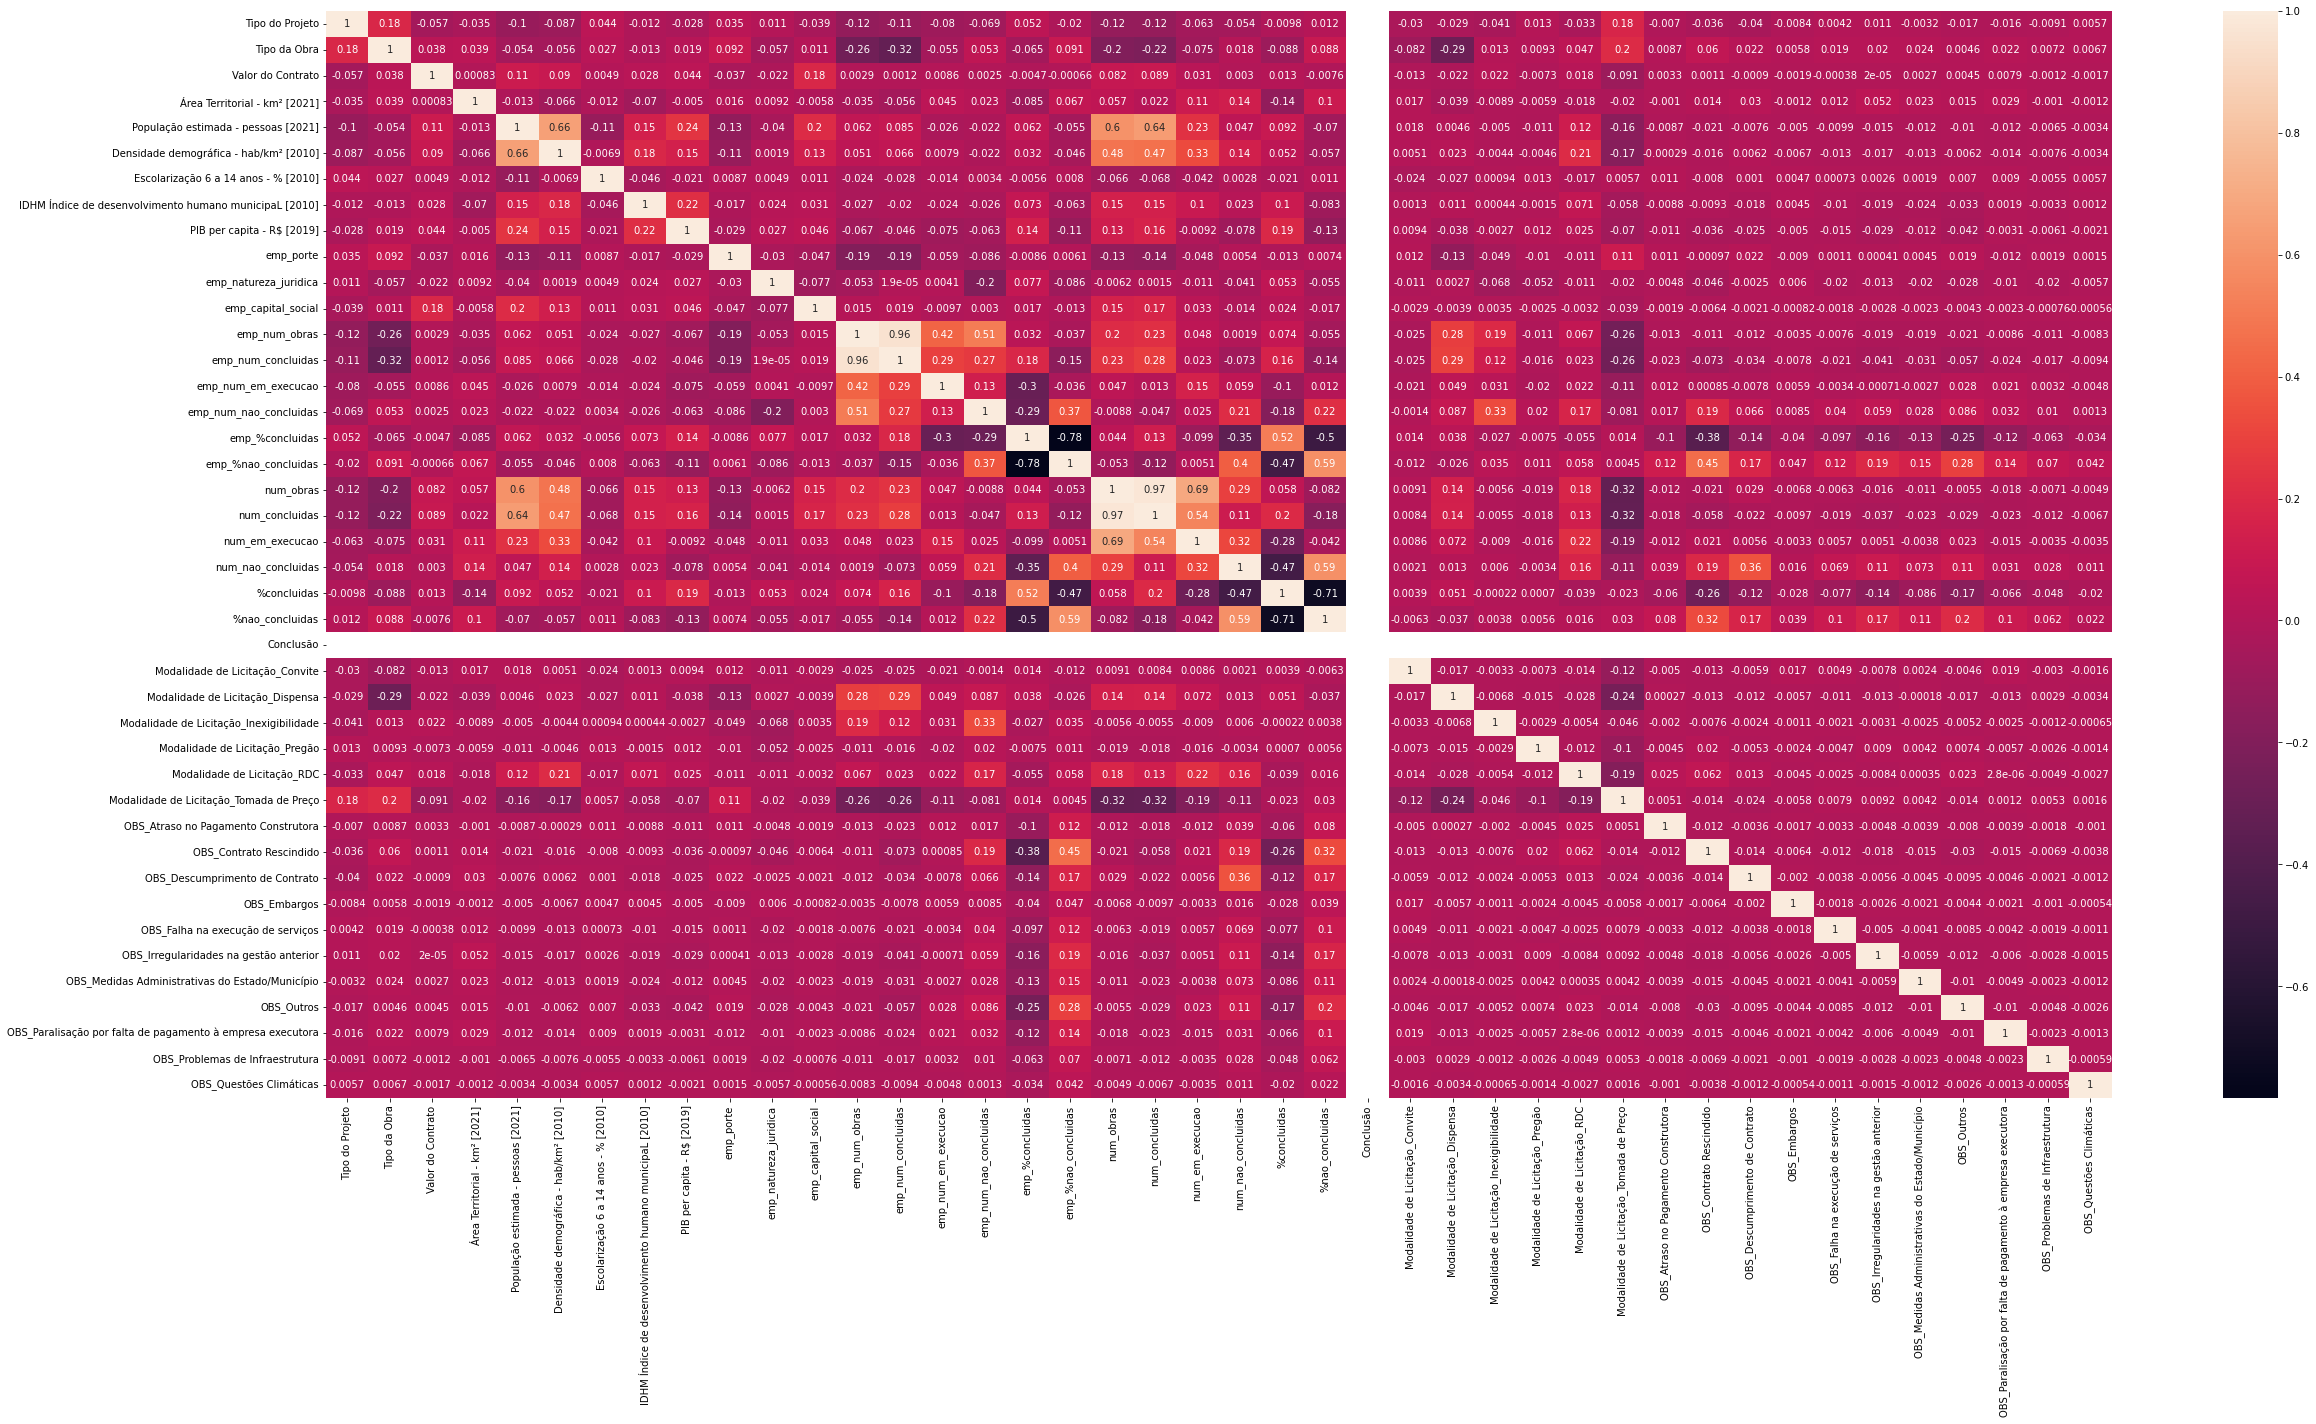

In [ ]:
df_projetoInicioModelagem.columns.values
columns = list(df_projetoInicioModelagem[df_projetoInicioModelagem.columns.values])
inp_df = pd.DataFrame(X_df_projetoInicioModelagem, columns=columns)
plt.figure(figsize=(40,20))
sns.heatmap(inp_df.corr(), annot=True)


## Separação dos dados em treina e teste

In [ ]:
# Utilizando o train_test_split para separar meus dados de treino e teste. Para isso separamos 80% dos dados para treino e
#...extratificamos os dados para respeitar a proporção de valores 0 e 1 da coluna target, entre a amostra de teste e a amostra
#...de treino

X_train, X_test, y_train, y_test = train_test_split(X_df_projetoInicioModelagem,
                                                    y_df_projetoInicioModelagem,
                                                    train_size=0.8,
                                                    stratify= df_projetoInicioModelagem['Conclusão'],
                                                    random_state=123)

## Balanceamento de Classes

In [ ]:
!pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE

## O método SMOTE produz dados sintéticos da classe minoritária.

In [ ]:
# o parâmetro sampling_strategy me permite escolher qual o percentual de dados sintéticos que eu quero gerar em relação
#...a classe majoritária. Ou seja, se que disser que o sampling_strategy = 0.5 eu estou dizendo que quero gerar dados sintéticos
#...até que a classe minoritária atinja 50% da classe majoritária.

# Isso é importante pois se eu criar muitos dados sintéticos eu corro o risco de ter overfitting.

In [ ]:
smt = SMOTE(sampling_strategy = 0.5)

In [ ]:
X_train_balanceado , y_train_balanceado = smt.fit_resample(X_train, y_train)

In [ ]:
np.bincount(y_train_balanceado)

array([12549,  6274], dtype=int64)

In [ ]:
# Criamos uma lista com 5 modelos distintos de classificação para que roda-los um a um e ver qual nos tras o melhor resultado.

classifiers = [
    KNeighborsClassifier(),
    GaussianNB(),
    LogisticRegression(max_iter=5000),
    DecisionTreeClassifier(min_samples_leaf=20),
    RandomForestClassifier(min_samples_leaf=20),
    GradientBoostingClassifier(),
    ]

In [ ]:
# Rotina para instanciar, predizer e medir os rasultados de todos os modelos

for clf in classifiers:
    # instanciando o modelo
    clf.fit(X_train_balanceado, y_train_balanceado)    
    # armazenando o nome do modelo na variável name
    name = clf.__class__.__name__    
    # imprimindo o nome do modelo
    print("="*30)
    print(name)    
    # imprimindo os resultados do modelo
    print('****Results****')
    y_pred = clf.predict(X_test)    
    #plot_confusion_matrix(y_test, y_pred)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("f1_score:", f1_score(y_test, y_pred, average='weighted'))
    print("Recall:", recall_score(y_test, y_pred, average='weighted'))
    print("Precision:", precision_score(y_test, y_pred, average='weighted'))

KNeighborsClassifier
****Results****
Accuracy: 0.7414397411701267
f1_score: 0.7632021589213266
Recall: 0.7414397411701267
Precision: 0.7949646442042134
GaussianNB
****Results****
Accuracy: 0.8306821245618765
f1_score: 0.784623430455697
Recall: 0.8306821245618765
Precision: 0.7658557331391661
LogisticRegression
****Results****
Accuracy: 0.8347263413318954
f1_score: 0.7828844027875825
Recall: 0.8347263413318954
Precision: 0.7644337220876286
DecisionTreeClassifier
****Results****
Accuracy: 0.9530870854677811
f1_score: 0.9530870854677811
Recall: 0.9530870854677811
Precision: 0.9530870854677811
RandomForestClassifier
****Results****
Accuracy: 0.9517390132111081
f1_score: 0.9525107947942367
Recall: 0.9517390132111081
Precision: 0.9537854657357306
GradientBoostingClassifier
****Results****
Accuracy: 0.9582097600431383
f1_score: 0.958630231073852
Recall: 0.9582097600431383
Precision: 0.9592502070382871


# Escolhemos o `RandomForestClassifier` para realizar a modelagem, por conta dos resultados melhores encontrados com os métodos de ensemble.

In [ ]:
# construindo o modelo, sem nenhum parâmetro de otimização

clf = RandomForestClassifier()

In [ ]:
# treinando o modelo

clf.fit(X_train_balanceado, y_train_balanceado)

RandomForestClassifier()

In [ ]:
y_pred = clf.predict_proba(X_test)

In [ ]:
def plot_confusion_matrix(y_test, y_pred):
    sns.heatmap(confusion_matrix(y_test, y_pred),
                annot=True,
                cbar=False,
                cmap= matplotlib.cm.get_cmap('gist_yarg'),
                fmt='.0f') #tira a notação científica
    plt.ylabel('Real')
    plt.xlabel('Predicted')
    ax = plt.gca()
    ax.xaxis.set_ticks_position('top')
    ax.xaxis.set_label_position('top')

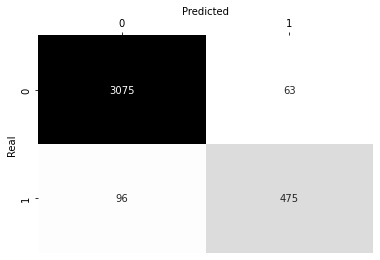

In [ ]:
# Utilizando o predict_proba e estabelecendo a margem de 50% para definição da predição entre 0 e 1.

y_pred_proba = clf.predict_proba(X_test)[:, 1]
y_pred_proba = [1 if pred >= 0.6 else 0 for pred in y_pred_proba]
plot_confusion_matrix(y_test, y_pred_proba)

In [ ]:
print(classification_report(y_test, y_pred_proba))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      3138
           1       0.88      0.83      0.86       571

    accuracy                           0.96      3709
   macro avg       0.93      0.91      0.92      3709
weighted avg       0.96      0.96      0.96      3709



# Curva ROC

In [ ]:
from sklearn import metrics

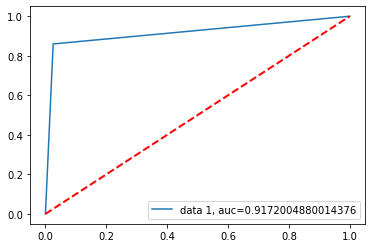

In [ ]:
# plotando a curva ROC
#y_pred_proba = clf.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.legend(loc=4)
plt.show()

# Comparando as métricas Acurácia, Precisão e Recall, obtidas com os dados de treino e as mesmas métricas obtidas com os dados de teste, para verificar se há grande variação entre elas.

In [ ]:
print(f'A acurácia do treino foi: {accuracy_score(y_train_balanceado, clf.predict(X_train_balanceado))}')
print(f'A acurácia do teste foi: {accuracy_score(y_test, clf.predict(X_test))}')

A acurácia do treino foi: 0.962917707060511
A acurácia do teste foi: 0.9501213265031005


In [ ]:
print(f'A precisão do treino foi: {precision_score(y_train_balanceado, clf.predict(X_train_balanceado))}')
print(f'A precisão do teste foi: {precision_score(y_test, clf.predict(X_test))}')

A precisão do treino foi: 0.9375392341494037
A precisão do teste foi: 0.8063492063492064


In [ ]:
print(f'O recall do treino foi: {recall_score(y_train_balanceado, clf.predict(X_train_balanceado))}')
print(f'O recall do teste foi: {recall_score(y_test, clf.predict(X_test))}')

O recall do treino foi: 0.9521836149187122
O recall do teste foi: 0.8896672504378283


### O resultado praticamente não apresentou distorção das métricas resultado utilizando os dados de treino e de teste.

# `Cross Validation`
Esse processo é importante para me garantir que não termeos overfitting, nem underfitting. Todos os meus dados serão utilizados tanto para treinamento quanto para validação.

Usamos KFold, pois embora o StratifiedKFold lide melhor com os dados desbalanceados, não há necessidade, nesse caso, pois já fizemos o balanceamento das classes.

In [ ]:
cv_kfold = KFold(n_splits= 10, shuffle=True, random_state=123)

In [ ]:
resultado = cross_val_score(clf, X_train_balanceado, y_train_balanceado, cv= cv_kfold, scoring='precision')

In [ ]:
resultado

array([0.934375  , 0.94728435, 0.93030794, 0.94594595, 0.959375  ,
       0.95269168, 0.94049587, 0.94611727, 0.93990755, 0.95207668])

In [ ]:
resultado.mean()

0.944857728223796

# Usando o Feature Selection para encotrar o melhor número de features a serem utilizadas, bem como as features mais importantes.

## Feature selection

In [ ]:
k_vs_score = []
for k in range(2, 25, 2):
    selector = SelectKBest(score_func= f_classif, k=k)
    X_train2 = selector.fit_transform(X_train_balanceado, y_train_balanceado)
    X_test2 = selector.transform(X_test)

    clf = RandomForestClassifier(n_estimators= 100, n_jobs= -1, random_state= 0) #decisiontree
    clf.fit(X_train2, y_train_balanceado)

    p = clf.predict(X_test2)

    score = precision_score(y_test, p) #precision ou f1-score
    print('k = {} - Precision = {}'.format(k, score)) 
          
    k_vs_score.append(score)

k = 2 - Precision = 0.7712665406427222
k = 4 - Precision = 0.7772277227722773
k = 6 - Precision = 0.8130360205831904
k = 8 - Precision = 0.8175559380378657
k = 10 - Precision = 0.8370497427101201
k = 12 - Precision = 0.847457627118644
k = 14 - Precision = 0.8491525423728814
k = 16 - Precision = 0.8598615916955017
k = 18 - Precision = 0.8615916955017301
k = 20 - Precision = 0.8581314878892734
k = 22 - Precision = 0.8606271777003485
k = 24 - Precision = 0.8564102564102564


## Encontramos que utilizando 16 features temos a melhor precisão do modelo

<AxesSubplot:>

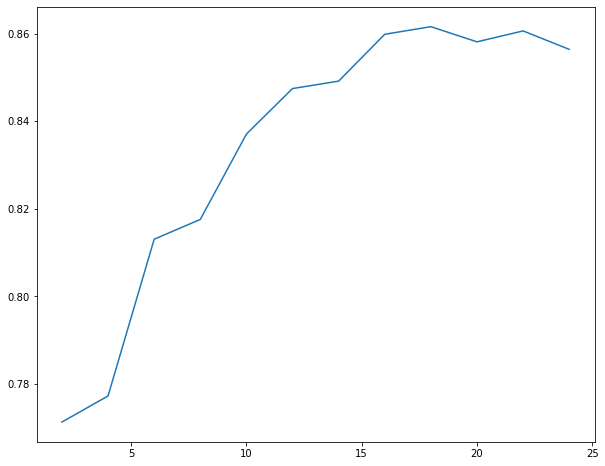

In [ ]:
pd.Series(k_vs_score, index=range(2,25,2)).plot(figsize=(10,8))

In [ ]:
selector = SelectKBest(score_func= f_classif, k=18)
selector.fit(X_train, y_train)

SelectKBest(k=18)

In [ ]:
# descobrindo quais as 18 colunas que eu devo usar

mask = selector.get_support()
X_test.columns[mask]

Index(['Área Territorial - km² [2021]', 'PIB per capita - R$ [2019]',
       'emp_num_concluidas', 'emp_num_nao_concluidas', 'emp_%concluidas',
       'emp_%nao_concluidas', 'num_concluidas', 'num_nao_concluidas',
       '%concluidas', '%nao_concluidas', 'OBS_Atraso no Pagamento Construtora',
       'OBS_Contrato Rescindido', 'OBS_Descumprimento de Contrato',
       'OBS_Falha na execução de serviços',
       'OBS_Irregularidades na gestão anterior',
       'OBS_Medidas Administrativas do Estado/Município', 'OBS_Outros',
       'OBS_Paralisação por falta de pagamento à empresa executora'],
      dtype='object')

In [ ]:
clf.feature_importances_

array([0.02202994, 0.00662303, 0.01854501, 0.01772493, 0.01138513,
       0.02119267, 0.09222103, 0.02282517, 0.09284999, 0.19632454,
       0.2064308 , 0.02673417, 0.05615911, 0.07475368, 0.0940218 ,
       0.00095764, 0.0062714 , 0.02070707, 0.0003923 , 0.0012108 ,
       0.00101155, 0.00101128, 0.00758189, 0.00103508])

In [ ]:
clf.feature_names_in_

AttributeError: 'RandomForestClassifier' object has no attribute 'feature_names_in_'

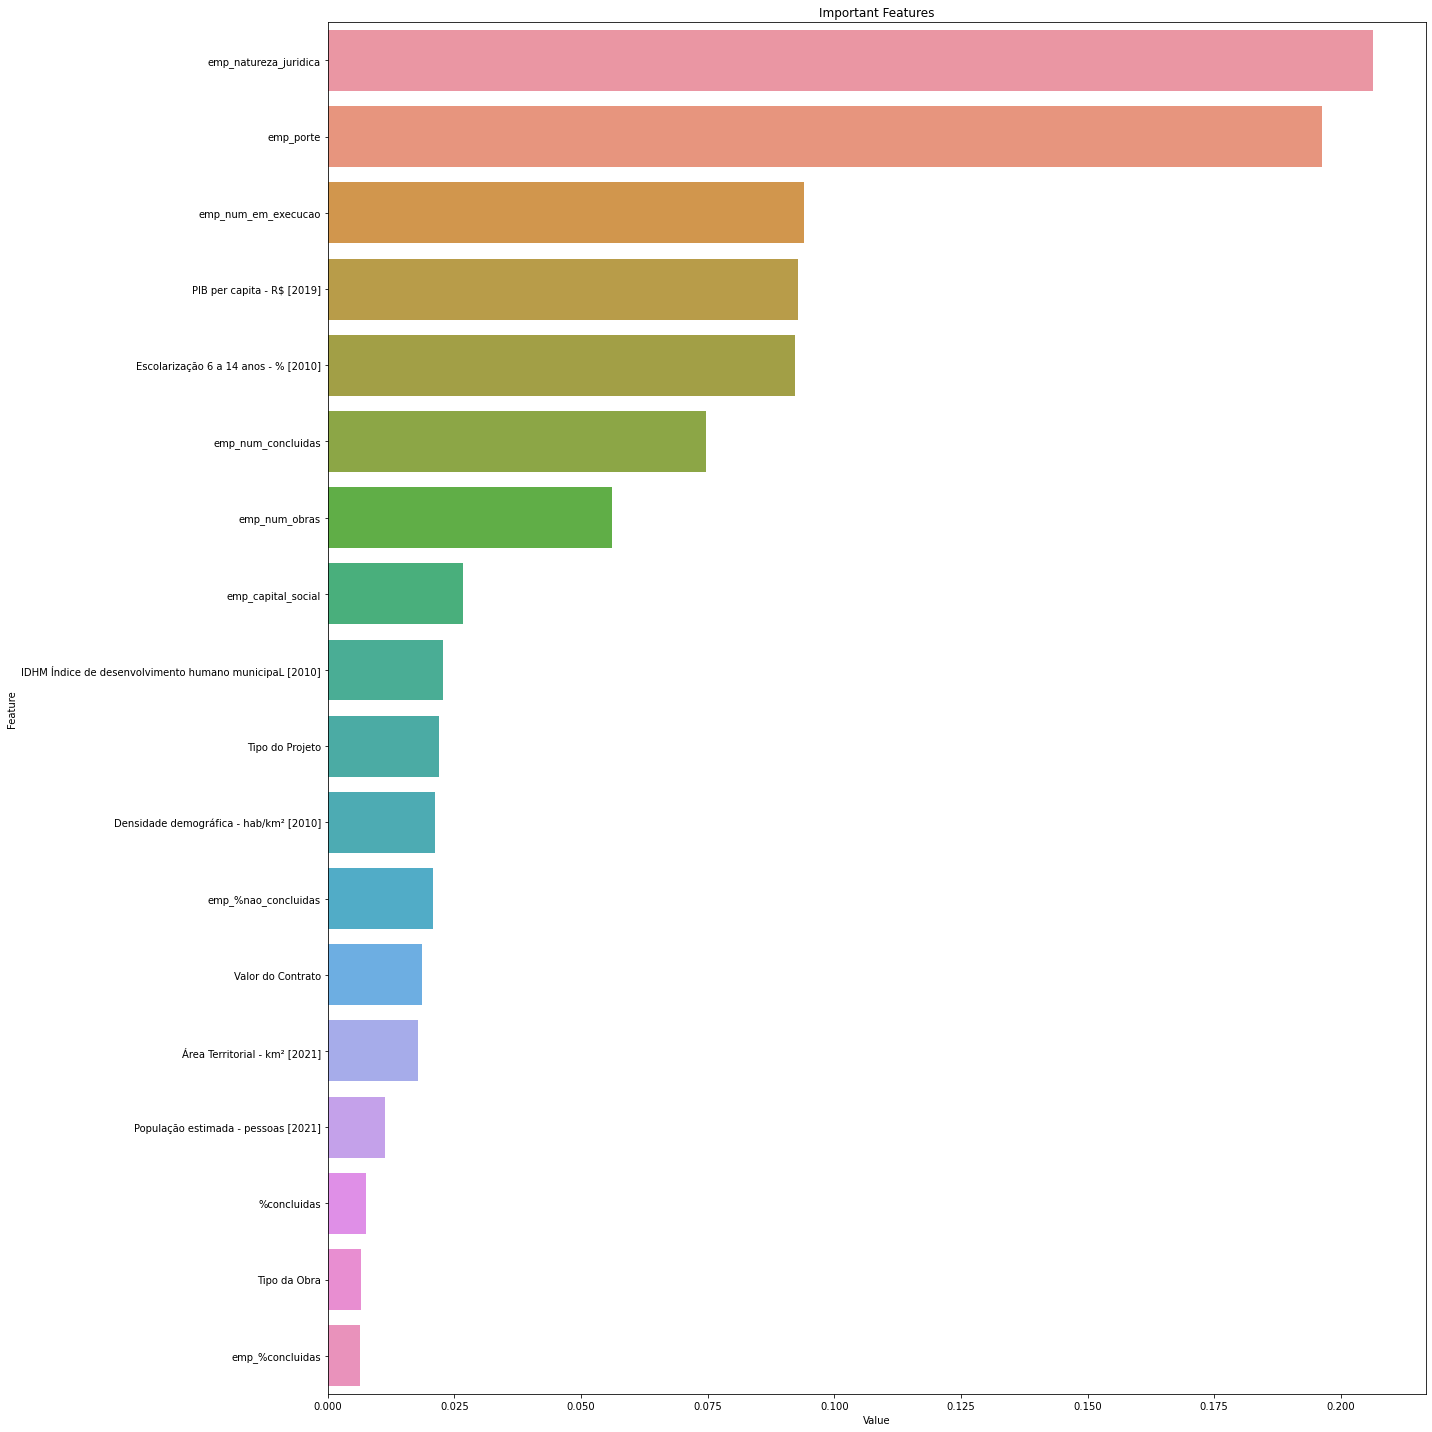

In [ ]:
cols_model = X_train_balanceado.columns#.drop(["voting"],axis=1).columns

feature_imp = pd.DataFrame(sorted(zip(clf.feature_importances_,cols_model)), columns=['Value','Feature'])
plt.figure(figsize=(20, 20))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False).iloc[:18])
plt.title('Important Features')
plt.tight_layout()
plt.show()


In [ ]:
col_select =feature_imp.sort_values(by="Value", ascending=False).iloc[:18]
col_select = col_select.Feature.to_list()

X_select = X_train_balanceado[col_select]
X_select.shape

(18823, 18)

# Tunning

In [ ]:
parametros = {'n_estimators': [100,200,500,1000],
              'criterion': ['gini', 'entropy'], 
              'max_depth': [2,5,10],
              'min_samples_split': [2,5,10],
             }

In [ ]:
grid_search = GridSearchCV(estimator= RandomForestClassifier(), param_grid=parametros)
grid_search.fit(X_train_balanceado, y_train_balanceado)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 500}
0.9582968868415817


In [ ]:
# construindo o modelo

clf = RandomForestClassifier(criterion='gini', min_samples_split=2, max_depth = 10, n_estimators = 500)

In [ ]:
# treinando o modelo

clf.fit(X_train_balanceado, y_train_balanceado)

RandomForestClassifier(max_depth=10, n_estimators=500)

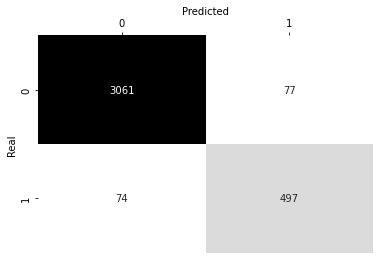

In [ ]:
# Utilizando o predict_proba e estabelecendo a margem de 50% para definição da predição entre 0 e 1.

y_pred_proba = clf.predict_proba(X_test)[:, 1]
y_pred_proba = [1 if pred >= 0.6 else 0 for pred in y_pred_proba]
plot_confusion_matrix(y_test, y_pred_proba)

In [ ]:
print(classification_report(y_test, y_pred_proba))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3138
           1       0.87      0.87      0.87       571

    accuracy                           0.96      3709
   macro avg       0.92      0.92      0.92      3709
weighted avg       0.96      0.96      0.96      3709



In [ ]:
print(f'A acurácia do treino foi: {accuracy_score(y_train_balanceado, clf.predict(X_train_balanceado))}')
print(f'A acurácia do teste foi: {accuracy_score(y_test, clf.predict(X_test))}')

A acurácia do treino foi: 0.9714710726239175
A acurácia do teste foi: 0.9541655432731194


In [ ]:
print(f'A precisão do treino foi: {precision_score(y_train_balanceado, clf.predict(X_train_balanceado))}')
print(f'A precisão do teste foi: {precision_score(y_test, clf.predict(X_test))}')

A precisão do treino foi: 0.9526589869023198
A precisão do teste foi: 0.8239095315024233


In [ ]:
print(f'O recall do treino foi: {recall_score(y_train_balanceado, clf.predict(X_train_balanceado))}')
print(f'O recall do teste foi: {recall_score(y_test, clf.predict(X_test))}')

O recall do treino foi: 0.9622250557857825
O recall do teste foi: 0.8931698774080561
